# **<a name="import"></a>🔧 1. Import Libraries**

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

#**<a name="load"></a>📥 2. Load Dataset**

In [ ]:
df = pd.read_csv('/content/zomato_pune_V002.csv')
df.head()

,Restaurant_Name,Web_Link,Locality,Sponsored,Ratings_out_of_5,Number of votes,Phone_number,Cuisines,Charges_for_two,payment_modes,...,Table booking recommended,Resto Bar,Serves Alcohol,Breakfast,Catering Available,Disabled Friendly,Serves Halal,Takeaway Only,BYOB Only,spam_review
0,AB's - Absolute Barbecues,https://www.zomato.com/pune/abs-absolute-barbe...,Hinjawadi,Casual Dining,4.9,7029 votes,+91 9373112211,"Continental, North Indian, Chinese","₹1,400",Cash and Cards accepted,...,1,0,0,0,0,0,0,0,0,1539.0
1,Cafe Co2 Resto Lounge,https://www.zomato.com/pune/cafe-co2-resto-lou...,Bhugaon,"Lounge, Casual Dining",4.6,2578 votes,080 46971866,"North Indian, Chinese, Continental, Kebab, Sea...","₹1,500",Cash and Cards accepted,...,1,0,0,0,0,0,0,0,0,139.0
2,Paasha - JW Marriott Pune,https://www.zomato.com/pune/paasha-jw-marriott...,Senapati Bapat Road,Fine Dining,4.6,3291 votes,080 46971369,"North Indian, Kebab, Biryani","₹2,500","Cash,Cards and Digital Payments accepted",...,1,0,0,0,0,0,0,0,0,119.0
3,I Amsterdam,https://www.zomato.com/pune/i-amsterdam-hinjawadi,Hinjawadi,"Casual Dining, Bar",4.3,430 votes,+91 8669698666 +91 8669697666,"Asian, European, Modern Indian, Italian","₹1,400","Cash,Cards and Digital Payments accepted",...,1,0,0,0,0,0,0,0,0,8.0
4,FC Road Social,https://www.zomato.com/pune/fc-road-social-shi...,Shivaji Nagar,"Bar, Casual Dining",4.5,2138 votes,+91 9172378889 020 29805112,"North Indian, Chinese, Biryani, American, Cont...","₹1,500","Cash,Cards and Digital Payments accepted",...,0,0,0,1,0,0,0,0,0,132.0


#**<a name="cleaning"></a>🧹 3. Data Cleaning**

In [ ]:
# Clean Charges_for_two
df['Charges_for_two'] = (
    df['Charges_for_two']
    .replace('Not Present', np.nan)
    .str.replace('₹', '', regex=False)
    .str.replace(',', '', regex=False)
)
df['Charges_for_two'] = pd.to_numeric(df['Charges_for_two'], errors='coerce')


In [ ]:
# Clean "Number of votes"
df['Number of votes'] = (
    df['Number of votes']
    .astype(str)
    .str.replace('votes', '', regex=False)
    .str.replace(',', '', regex=False)
    .str.strip()
)
df['Number of votes'] = pd.to_numeric(df['Number of votes'], errors='coerce')


In [ ]:
# Clean Ratings column
df['Ratings_out_of_5'] = pd.to_numeric(df['Ratings_out_of_5'], errors='coerce')


#**<a name="feature"></a>🧱 4. Feature Engineering**

In [ ]:
# Clean Cuisine list
df['Cuisine_List'] = df['Cuisines'].astype(str).str.split(',')
df['Cuisine_List'] = df['Cuisine_List'].apply(lambda x: [c.strip() for c in x])


In [ ]:
# Clean Locality
df['Locality'] = df['Locality'].astype(str).str.strip()


In [ ]:
# Final selected data
df_cleaned = df[['Restaurant_Name', 'Locality', 'Ratings_out_of_5', 'Number of votes', 'Charges_for_two', 'Cuisine_List']]
df_cleaned.head()


,Restaurant_Name,Locality,Ratings_out_of_5,Number of votes,Charges_for_two,Cuisine_List
0,AB's - Absolute Barbecues,Hinjawadi,4.9,7029.0,1400.0,"[Continental, North Indian, Chinese]"
1,Cafe Co2 Resto Lounge,Bhugaon,4.6,2578.0,1500.0,"[North Indian, Chinese, Continental, Kebab, Se..."
2,Paasha - JW Marriott Pune,Senapati Bapat Road,4.6,3291.0,2500.0,"[North Indian, Kebab, Biryani]"
3,I Amsterdam,Hinjawadi,4.3,430.0,1400.0,"[Asian, European, Modern Indian, Italian]"
4,FC Road Social,Shivaji Nagar,4.5,2138.0,1500.0,"[North Indian, Chinese, Biryani, American, Con..."


#**<a name="localities"></a>🏙️ 5. Top Localities**

In [ ]:
df['Locality'] = df['Locality'].astype(str).str.strip()

# View top 10 localities
df['Locality'].value_counts().head(10)


,count
Locality,
Hadapsar,575
Kothrud,560
Wakad,523
Hinjawadi,481
Sinhgad Road,458
Viman Nagar,457
Kharadi,454
Baner,384
Chinchwad,314


#**<a name="visuals"></a>📊 6. Data Visualizations**

##**🍽️ Top 20 Cuisines in Pune**

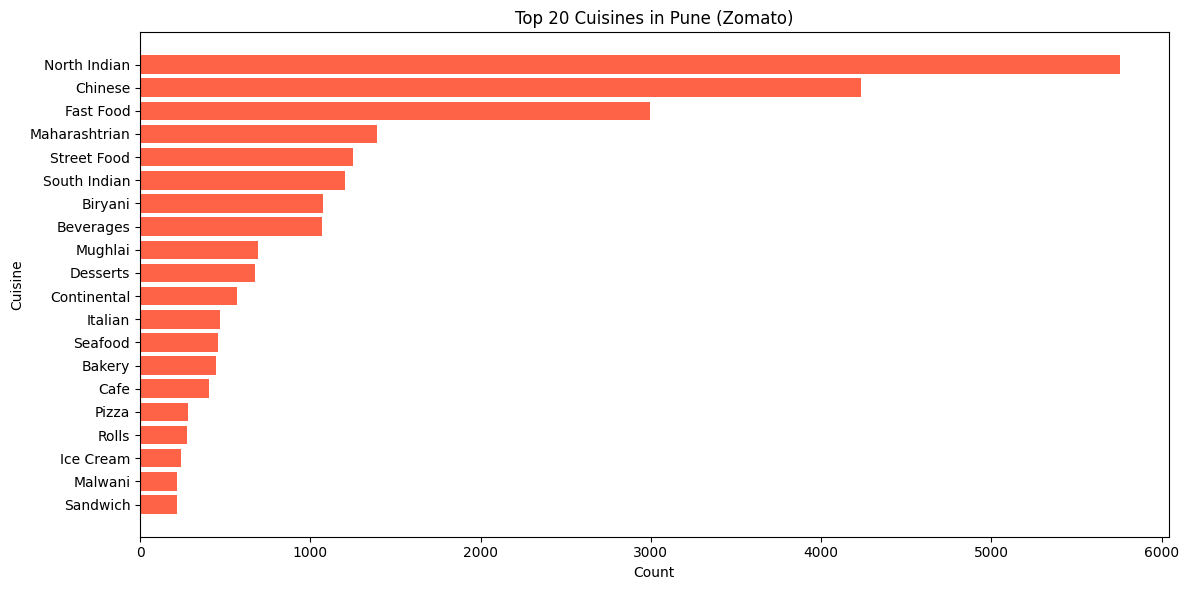

In [ ]:

# Top 20 Cuisines in Pune (Zomato)
cuisine_counter = Counter([cuisine for sublist in df['Cuisine_List'] for cuisine in sublist])
common_cuisines = pd.DataFrame(cuisine_counter.most_common(20), columns=['Cuisine', 'Count'])

# Plot
plt.figure(figsize=(12, 6))
plt.barh(common_cuisines['Cuisine'], common_cuisines['Count'], color='tomato')
plt.gca().invert_yaxis()  # Highest on top
plt.title('Top 20 Cuisines in Pune (Zomato)')
plt.xlabel('Count')
plt.ylabel('Cuisine')
plt.tight_layout()
plt.show()




##**⭐Distribution of Ratings**

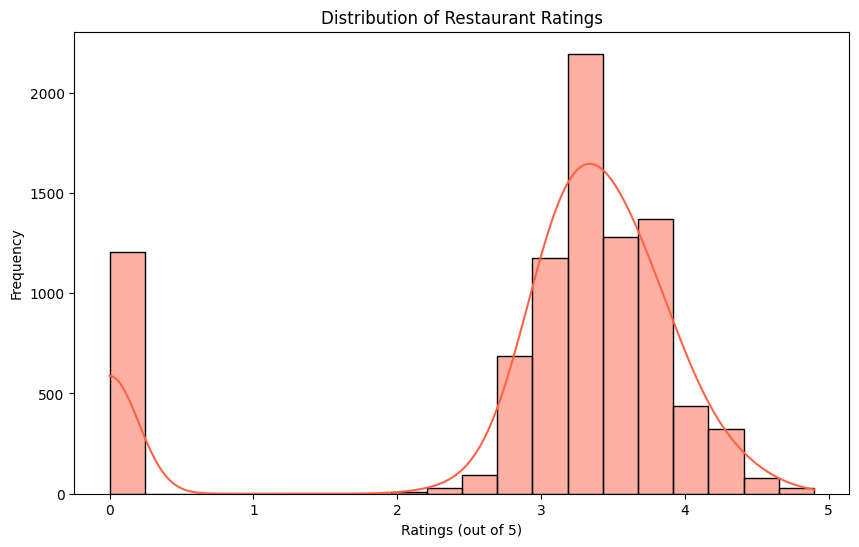

In [ ]:

plt.figure(figsize=(10,6))
sns.histplot(df["Ratings_out_of_5"], bins=20, kde=True, color="tomato")
plt.title("Distribution of Restaurant Ratings")
plt.xlabel("Ratings (out of 5)")
plt.ylabel("Frequency")
plt.show()


##**📈 Votes vs Ratings by Locality**

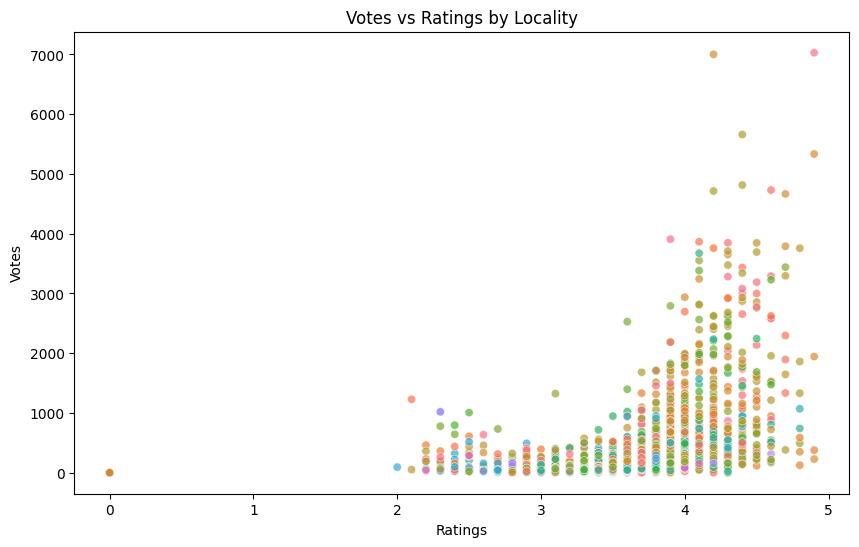

In [ ]:

# Votes vs Ratings
plt.figure(figsize=(10,6))
sns.scatterplot(x="Ratings_out_of_5", y="Number of votes", data=df, hue="Locality", alpha=0.7, legend=False)
plt.title("Votes vs Ratings by Locality")
plt.xlabel("Ratings")
plt.ylabel("Votes")
plt.show()



##**🏙️ Top 10 Localities by Restaurant Count**

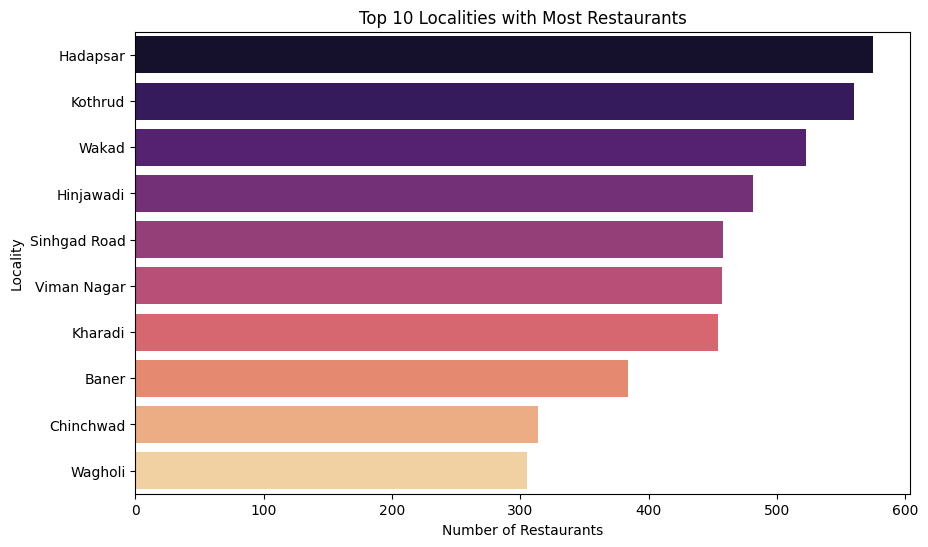

In [ ]:
# Prepare data for plot
top_localities_df = df['Locality'].value_counts().nlargest(10).reset_index()
top_localities_df.columns = ['Locality', 'Count']

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_localities_df, x='Count', y='Locality', hue='Locality', palette='magma', legend=False)
plt.title("Top 10 Localities with Most Restaurants")
plt.xlabel("Number of Restaurants")
plt.ylabel("Locality")
plt.show()


In [ ]:
df_cleaned.to_csv("zomato_pune_cleaned.csv", index=False)